In [11]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('D:\\Data Science\\Machine Learning\\Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
24,28,14
144,77,12
101,62,48
54,43,45
107,63,46


In [13]:
data = data.rename(columns={'Annual Income (k$)':'income',
                            'Spending Score (1-100)':'score'})
data.sample(5)

,income,score
9,19,72
156,78,1
19,23,98
50,42,52
107,63,46


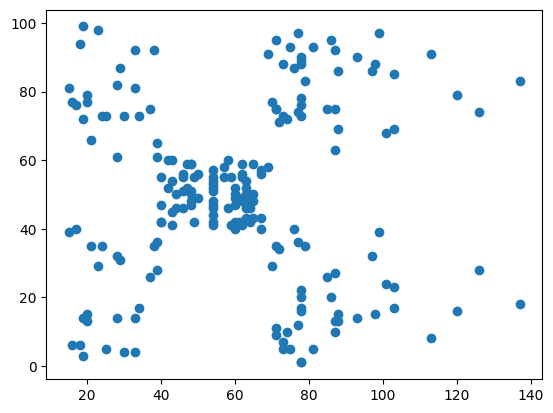

In [14]:
plt.scatter(data['income'],data['score'])

In [17]:
from sklearn.cluster import KMeans

k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []

for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['income','score']])
    wcss_error.append(model.inertia_)


In [18]:
wcss_error

[269981.28,
 183811.28277016425,
 106348.37306211119,
 73679.78903948834,
 44454.47647967974,
 37455.98455516028,
 30566.45113025186,
 25028.020475269415,
 22894.81158312417,
 22600.63520593938]

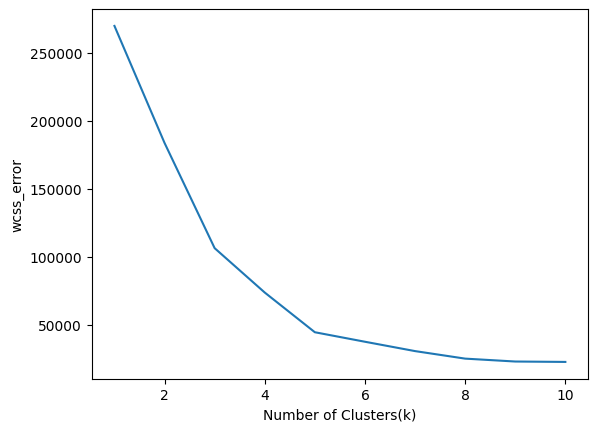

In [20]:
plt.xlabel('Number of Clusters(k)')
plt.ylabel('wcss_error')
plt.plot(k_values,wcss_error)

In [25]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
pred = model.fit_predict(data)
pred

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [26]:
data.head()

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [28]:
data['Cluster'] = pred
data.sample(10)

,income,score,Cluster
14,20,13,1
171,87,75,4
63,47,59,0
49,40,42,0
122,69,58,0
65,48,59,0
43,39,61,0
51,42,60,0
104,62,56,0
144,77,12,2


In [34]:
c1 = data[data['Cluster']==0]
c2 = data[data['Cluster']==1]
c3 = data[data['Cluster']==2]
c4 = data[data['Cluster']==3]
c5 = data[data['Cluster']==4]

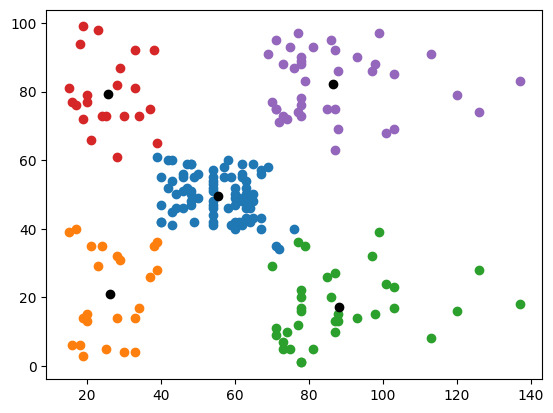

In [40]:
plt.scatter(c1['income'],c1['score'])
plt.scatter(c2['income'],c2['score'])
plt.scatter(c3['income'],c3['score'])
plt.scatter(c4['income'],c4['score'])
plt.scatter(c5['income'],c5['score'])

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],color = 'black')

In [37]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])